# 1. Problem Statement

An education company named X Education sells online courses to industry professionals. From its various lead collection programmes, it collects data. The objective is to identify the most pottential high quality leads or 'Hot leads' that might convert into probable customers. Here, I built a predictive model that assign a lead score to all the leads (high lead score has higher conversion chanches and lower lead score has lower conversion chances

# 2. Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
import statsmodels.api as sm
from statsmodels.compat import lzip
import scipy.stats as stats
from scipy.stats import norm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
plt.style.use('ggplot')

# 3. Load Data

In [12]:
leadscore_df = pd.read_csv("downloads/Lead-scoring/Lead.csv")
leadscore_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [13]:
leadscore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Lets create a variable to store original rows information before any data cleaning/treatment

In [14]:
original_rows = leadscore_df.shape[0]
print('No of original rows: {0}'.format(original_rows))

No of original rows: 9240


## 3.1 Renaming & shortening the column headers for convenience

In [15]:
leadscore_df.rename(columns={'Converted':'Converted',
                            'Prospect ID':'ProspectId',
                            'Lead Number':'LeadNumber',
                            'Lead Origin':'LeadOrigin',
                            'Lead Source':'LeadSource',
                            'Do Not Email':'DndEmail',
                            'Do Not Call':'DndCall',
                            'TotalVisits':'TotalVisits',
                            'Total Time Spent on Website':'TotalWebsiteTime',
                            'Page Views Per Visit':'PagesPerVisit',
                            'Last Activity':'LastActivity',
                            'Country':'Country',
                            'Specialization':'Specialization',
                            'How did you hear about X Education':'HowHeard',
                            'What is your current occupation':'Occupation',
                            'What matters most to you in choosing a course':'MattersMost',
                            'Search':'Search',
                            'Magazine':'Magazine',
                            'Newspaper Article':'PaperArticle',
                            'X Education Forums':'EducationForum',
                            'Newspaper':'Newspaper',
                            'Digital Advertisement':'DigitalAd',
                            'Through Recommendations':'Recommendation',
                            'Receive More Updates About Our Courses':'ReceiveCourseUpdate',
                            'Tags':'Tags',
                            'Lead Quality':'LeadQuality',
                            'Update me on Supply Chain Content':'UpdateSupplyChain',
                            'Get updates on DM Content':'UpdateDMContent',
                            'Lead Profile':'LeadProfile',
                            'City':'City',
                            'Asymmetrique Activity Index':'ActivityIndex',
                            'Asymmetrique Profile Index':'ProfileIndex',
                            'Asymmetrique Activity Score':'ActivityScore',
                            'Asymmetrique Profile Score':'ProfileScore',
                            'I agree to pay the amount through cheque':'ChequePayment',
                            'A free copy of Mastering The Interview':'FreeCopy',
                            'Last Notable Activity':'LastNotableActivity'},
                   inplace=True)       

In [16]:
col_list = list(leadscore_df.columns)
col_list.insert(0,col_list.pop(col_list.index('Converted')))
leadscore_df = leadscore_df.loc[:,col_list]

In [17]:
leadscore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Converted            9240 non-null   int64  
 1   ProspectId           9240 non-null   object 
 2   LeadNumber           9240 non-null   int64  
 3   LeadOrigin           9240 non-null   object 
 4   LeadSource           9204 non-null   object 
 5   DndEmail             9240 non-null   object 
 6   DndCall              9240 non-null   object 
 7   TotalVisits          9103 non-null   float64
 8   TotalWebsiteTime     9240 non-null   int64  
 9   PagesPerVisit        9103 non-null   float64
 10  LastActivity         9137 non-null   object 
 11  Country              6779 non-null   object 
 12  Specialization       7802 non-null   object 
 13  HowHeard             7033 non-null   object 
 14  Occupation           6550 non-null   object 
 15  MattersMost          6531 non-null   o

## 3.2 Check for missing values and duplicates

In [18]:
pd.DataFrame([[leadscore_df.shape],
            [leadscore_df.isnull().sum().sum()],
             [leadscore_df.duplicated().sum()]],
            columns = ['Application Data Set'],
            index = ['Shape', 'Missingness', 'Duplicates'])

,Application Data Set
Shape,"(9240, 37)"
Missingness,41039
Duplicates,0


In [19]:
leadscore_df.head()

,Converted,ProspectId,LeadNumber,LeadOrigin,LeadSource,DndEmail,DndCall,TotalVisits,TotalWebsiteTime,PagesPerVisit,LastActivity,Country,Specialization,HowHeard,Occupation,MattersMost,Search,Magazine,PaperArticle,EducationForum,Newspaper,DigitalAd,Recommendation,ReceiveCourseUpdate,Tags,LeadQuality,UpdateSupplyChain,UpdateDMContent,LeadProfile,City,ActivityIndex,ProfileIndex,ActivityScore,ProfileScore,ChequePayment,FreeCopy,LastNotableActivity
0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,0,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,1,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,1,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 3.3 value 'Select' which default for unfilled value, we will treat as null values

In [20]:
leadscore_df[leadscore_df == 'Select'].count()

Converted                 0
ProspectId                0
LeadNumber                0
LeadOrigin                0
LeadSource                0
DndEmail                  0
DndCall                   0
TotalVisits               0
TotalWebsiteTime          0
PagesPerVisit             0
LastActivity              0
Country                   0
Specialization         1942
HowHeard               5043
Occupation                0
MattersMost               0
Search                    0
Magazine                  0
PaperArticle              0
EducationForum            0
Newspaper                 0
DigitalAd                 0
Recommendation            0
ReceiveCourseUpdate       0
Tags                      0
LeadQuality               0
UpdateSupplyChain         0
UpdateDMContent           0
LeadProfile            4146
City                   2249
ActivityIndex             0
ProfileIndex              0
ActivityScore             0
ProfileScore              0
ChequePayment             0
FreeCopy            

In [21]:
leadscore_df.replace('Select',np.NaN,inplace=True)
leadscore_df[leadscore_df == 'Select'].count()

Converted              0
ProspectId             0
LeadNumber             0
LeadOrigin             0
LeadSource             0
DndEmail               0
DndCall                0
TotalVisits            0
TotalWebsiteTime       0
PagesPerVisit          0
LastActivity           0
Country                0
Specialization         0
HowHeard               0
Occupation             0
MattersMost            0
Search                 0
Magazine               0
PaperArticle           0
EducationForum         0
Newspaper              0
DigitalAd              0
Recommendation         0
ReceiveCourseUpdate    0
Tags                   0
LeadQuality            0
UpdateSupplyChain      0
UpdateDMContent        0
LeadProfile            0
City                   0
ActivityIndex          0
ProfileIndex           0
ActivityScore          0
ProfileScore           0
ChequePayment          0
FreeCopy               0
LastNotableActivity    0
dtype: int64

## Look for missing value percentage

In [22]:
leadscore_df[leadscore_df.columns[leadscore_df.isnull().any()]].isnull().sum()

LeadSource          36
TotalVisits        137
PagesPerVisit      137
LastActivity       103
Country           2461
Specialization    3380
HowHeard          7250
Occupation        2690
MattersMost       2709
Tags              3353
LeadQuality       4767
LeadProfile       6855
City              3669
ActivityIndex     4218
ProfileIndex      4218
ActivityScore     4218
ProfileScore      4218
dtype: int64

In [23]:
#In terms of missing%
percent_missing = leadscore_df.isnull().sum() * 100 / len(leadscore_df)
missing_value_df = pd.DataFrame({'column_name': leadscore_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Converted,Converted,0.000000
ProspectId,ProspectId,0.000000
LeadNumber,LeadNumber,0.000000
LeadOrigin,LeadOrigin,0.000000
LeadSource,LeadSource,0.389610
DndEmail,DndEmail,0.000000
DndCall,DndCall,0.000000
TotalVisits,TotalVisits,1.482684
TotalWebsiteTime,TotalWebsiteTime,0.000000
PagesPerVisit,PagesPerVisit,1.482684


In [24]:
### Validate the total sum of missing values
leadscore_df[leadscore_df.columns[leadscore_df.isnull().any()]].isnull().sum().sum()

54419

In [25]:
#Get the list of columns with missing% > 30%
missing_data_cols = list(missing_value_df[missing_value_df['percent_missing']>30]['column_name'])
missing_data_cols

['Specialization',
 'HowHeard',
 'Tags',
 'LeadQuality',
 'LeadProfile',
 'City',
 'ActivityIndex',
 'ProfileIndex',
 'ActivityScore',
 'ProfileScore']

# 4. Data Cleaning

## 4.1 Drop columns with more than 30% missing values

In [26]:
print('number of columns before dropping high pcnt missing value columns are: {0}'.format(leadscore_df.shape[1]))
leadscore_df.drop(columns=missing_data_cols,inplace=True)
print('number of columns after dropping high pcnt missing value columns are: {0}'.format(leadscore_df.shape[1]))

number of columns before dropping high pcnt missing value columns are: 37
number of columns after dropping high pcnt missing value columns are: 27


## 4.2 Data Imputation to fill the missing value in the remaining columns

In [27]:
#In terms of missing%
percent_missing = leadscore_df.isnull().sum() * 100 / len(leadscore_df)
missing_value_df = pd.DataFrame({'column_name': leadscore_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Converted,Converted,0.000000
ProspectId,ProspectId,0.000000
LeadNumber,LeadNumber,0.000000
LeadOrigin,LeadOrigin,0.000000
LeadSource,LeadSource,0.389610
DndEmail,DndEmail,0.000000
DndCall,DndCall,0.000000
TotalVisits,TotalVisits,1.482684
TotalWebsiteTime,TotalWebsiteTime,0.000000
PagesPerVisit,PagesPerVisit,1.482684


In [28]:
#Get the list of columns with missing% > 2%
percent_missing = leadscore_df.isnull().sum() * 100 / len(leadscore_df)
missing_value_df = pd.DataFrame({'column_name': leadscore_df.columns,
                                 'percent_missing': percent_missing})
missing_data_cols = list(missing_value_df[missing_value_df['percent_missing']>2]['column_name'])
print('No of columns with data value missing pect > 2% are: {0}'.format(len(missing_data_cols)))
missing_data_cols

No of columns with data value missing pect > 2% are: 3


['Country', 'Occupation', 'MattersMost']

## Function to plot frequency and percentage wrt feature

In [29]:
def plot_frequency_and_percentage(feature,leads_df,category_df,another_row=False,height=8,ylabels=[]):
    
    if another_row:
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,height*2))
    else:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
    fig.subplots_adjust(hspace=0.3)
    fig.subplots_adjust(wspace=0.3)
    
    ## plot the frequency plot for each category in the required column
    ax1.set_title('Frequency Plot of {0}'.format(feature),color='blue')
    ax1.set_ylabel(feature) 
    ax1.set_xlabel('count')
    sns.countplot(y=feature,data=category_df.sort_values(by=feature),ax=ax1,color='green');
    if len(ylabels)>0:
        ax1.set_yticklabels(ylabels);
    
    ## plot the value percentage in each sub-category wrt the label
    ax2.set_title('Lead Converted label %',color='blue')
    ax2.set_ylabel(feature) 
    ax2.set_xlabel('percentage')
    leads_df.iloc[1].sort_values().plot(kind='barh',ax=ax2,color='orange');
    if len(ylabels)>0:
        ax2.set_yticklabels(ylabels)


## 1. Lets check for column Country

In [30]:
leadscore_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

### Since most of the values are 'India' and there is very less variation in data in this column Country, we will drop this column


In [32]:
print('number of columns before dropping column "Country" are: {0}'.format(leadscore_df.shape[1]))
leadscore_df.drop(columns=['Country'],inplace=True)
print('number of columns after dropping column "Country" are: {0}'.format(leadscore_df.shape[1]))

number of columns before dropping column "Country" are: 27
number of columns after dropping column "Country" are: 26


## 2. Lets check for column Occupation

In [33]:
leadscore_df['Occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

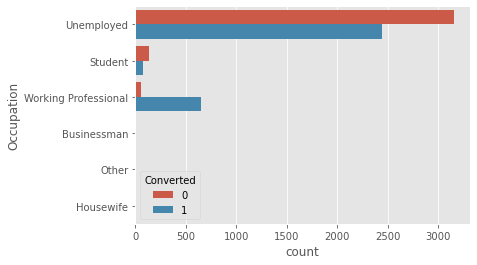

In [34]:
sns.countplot(y='Occupation',hue='Converted',data=leadscore_df);

In [35]:
leadscore_df['Occupation'].isnull().sum()

2690

### Assumptions
From above cell it can be seen that 
- Probably the user didnt find relevant option to select the value for Occupation so would have left the option as blank
- So instead of replacing the value with 'Unemployed' as most frequent value we will replace it with value <b>'Other'</b>

In [36]:
#replace null values with value 'Unemployed' in leadscore_df
print('Number of observations with null values in column Occupation: {0}'.format(
    leadscore_df['Occupation'].isnull().sum()))

leadscore_df['Occupation'].replace({np.NaN:'Other'},inplace=True)
print('Number of observations with null values in column Occupation after imputation: {0}'.format(
    leadscore_df['Occupation'].isnull().sum()))

Number of observations with null values in column Occupation: 2690
Number of observations with null values in column Occupation after imputation: 0


## 3. Lets check for column MattersMost

In [37]:
leadscore_df['MattersMost'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: MattersMost, dtype: int64

In [38]:
leadscore_df['MattersMost'].isnull().sum()

2709

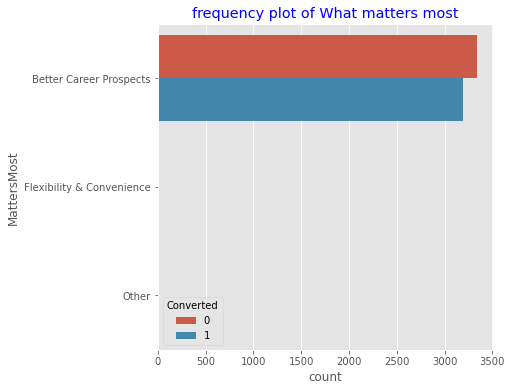

In [39]:
plt.figure(figsize=(6,6))
plt.title('frequency plot of What matters most',color='blue')
sns.countplot(y='MattersMost',hue='Converted',data=leadscore_df);

### Most of the values are 'Better Career Prospects', there is very less variation in data so this column will not add much value during our analysis. Drop this column

In [40]:
print('number of columns before dropping column "MattersMost" are: {0}'.format(leadscore_df.shape[1]))
leadscore_df.drop(columns=['MattersMost'],inplace=True)
print('number of columns after dropping column "MattersMost" are: {0}'.format(leadscore_df.shape[1]))

number of columns before dropping column "MattersMost" are: 26
number of columns after dropping column "MattersMost" are: 25


# Now lets check for missing values with missing value percentage > 0

In [41]:
#Get the list of columns with missing% > 0%
percent_missing = leadscore_df.isnull().sum() * 100 / len(leadscore_df)
missing_value_df = pd.DataFrame({'column_name': leadscore_df.columns,
                                 'percent_missing': percent_missing})
missing_data_cols = list(missing_value_df[missing_value_df['percent_missing']>0]['column_name'])
print('No of columns with data value missing prct are: {0}'.format(len(missing_data_cols)))
missing_data_cols

No of columns with data value missing prct are: 4


['LeadSource', 'TotalVisits', 'PagesPerVisit', 'LastActivity']

In [42]:
missing_value_df[missing_value_df['percent_missing']>0]

,column_name,percent_missing
LeadSource,LeadSource,0.389610
TotalVisits,TotalVisits,1.482684
PagesPerVisit,PagesPerVisit,1.482684
LastActivity,LastActivity,1.114719


## 4. Lets check for column LeadSource

In [43]:
leadscore_df['LeadSource'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: LeadSource, dtype: int64

In [44]:
#two values 'Google' and 'google' which refer to same lead source. So we will replace 'google' with 'Google'
print('number of observations with value google: {0}'.format(
    leadscore_df[leadscore_df['LeadSource']=='google']['LeadSource'].count()))
leadscore_df['LeadSource'].replace('google','Google',inplace=True)
print('number of observations with value google: {0}'.format(
    leadscore_df[leadscore_df['LeadSource']=='google']['LeadSource'].count()))

number of observations with value google: 5
number of observations with value google: 0


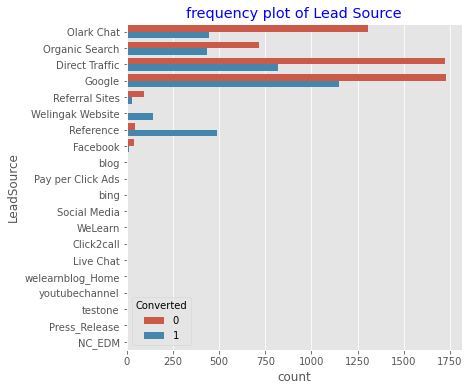

In [45]:
plt.figure(figsize=(6,6))
plt.title('frequency plot of Lead Source',color='blue')
sns.countplot(y='LeadSource',hue='Converted',data=leadscore_df);

### Since many categories have very less observations so lets combine them and create new category value - Others

In [46]:
leadscore_df['LeadSource'] = leadscore_df['LeadSource'].replace(
    ['bing','google','Click2call','Social Media','Press_Release','Live Chat','WeLearn','youtubechannel',
     'welearnblog_Home','NC_EDM','testone','Pay per Click Ads','blog'],'Others')
leadscore_df['LeadSource'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: LeadSource, dtype: int64

In [47]:
leadscore_df['LeadSource'].isnull().sum()

36

In [48]:
## replace null values with most frequent value
print('Number of observations with null values in column LeadSource: {0}'.format(
    leadscore_df['LeadSource'].isnull().sum()))

# Use SimpleImputer class to impute missing values
imp = SimpleImputer(missing_values=np.NaN, strategy= 'most_frequent')
imp.fit(leadscore_df[['LeadSource']])

print('Most frequent value is : {0}'.format(imp.statistics_[0]))

leadscore_df['LeadSource'] = imp.transform(leadscore_df[['LeadSource']]).ravel()

print('Number of observations with null values in column LeadSource after imputation: {0}'.format(
    leadscore_df['LeadSource'].isnull().sum()))

Number of observations with null values in column LeadSource: 36
Most frequent value is : Google
Number of observations with null values in column LeadSource after imputation: 0


## 4.3 Treat Ouliers

## 5. Lets check for column TotalVisits

In [49]:
leadscore_df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [50]:
leadscore_df['TotalVisits'].isnull().sum()

137

In [51]:
leadscore_df.shape

(9240, 25)

In [52]:
totalvisits_med = leadscore_df['TotalVisits'].median()
totalvisits_med

3.0

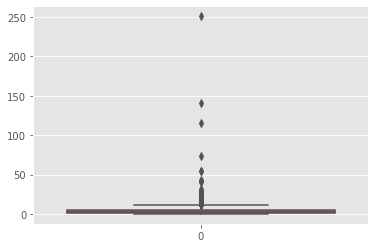

In [53]:
sns.boxplot(leadscore_df['TotalVisits']);

In [54]:
#replace null values with value 3.0 in leadTotalVisits_df
print('Number of observations with null values in column TotalVisits: {0}'.format(
    leadscore_df['TotalVisits'].isnull().sum()))
leadscore_df['TotalVisits'].replace({np.NaN:totalvisits_med},inplace=True)
print('Number of observations with null values in column TotalVisits after imputation: {0}'.format(
    leadscore_df['TotalVisits'].isnull().sum()))

Number of observations with null values in column TotalVisits: 137
Number of observations with null values in column TotalVisits after imputation: 0


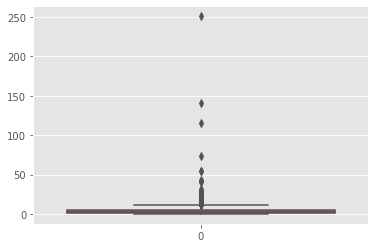

In [55]:
sns.boxplot(leadscore_df['TotalVisits']);

In [56]:
#treating outliers
leadscore_df['TotalVisits'].describe([0,0.05,0.25,0.5,0.75,0.9,0.95,0.99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
0%          0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

TotalVisits 99th percentile value: 17.0


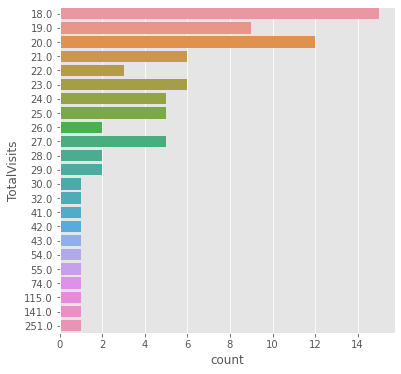

In [57]:
print('TotalVisits 99th percentile value: {0}'.format(leadscore_df['TotalVisits'].quantile(0.99)))
plt.figure(figsize=(6,6));
sns.countplot(y=leadscore_df[leadscore_df['TotalVisits']>17]['TotalVisits'].sort_values());

In [58]:
leadscore_df[leadscore_df['TotalVisits']>55]['TotalVisits'].count()

4

### Drop these 4 rows where TotalVisits>55

In [59]:
#Since data values are gradually increasing so we will keep the upper limit of data till 55. We will drop the remaining rows with TotalVisits>55
print('shape of dataframe before dropping rows: {0}'.format(leadscore_df.shape))
print('Total number of rows to be dropped: {0}'.format(
    leadscore_df[leadscore_df['TotalVisits']>55]['TotalVisits'].count()))
leadscore_df.drop(index=leadscore_df[leadscore_df['TotalVisits']>55].index,inplace=True)
print('shape of dataframe after dropping rows: {0}'.format(leadscore_df.shape))

shape of dataframe before dropping rows: (9240, 25)
Total number of rows to be dropped: 4
shape of dataframe after dropping rows: (9236, 25)


## 6. Lets check for column PagesPerVisit

In [60]:
leadscore_df['PagesPerVisit'].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
1.80       13
6.50       13
2.75       12
1.40       11
2.20        9
4.33        9
14.00       9
2.80        9
2.17        8
1.60        8
3.25        8
13.00       6
2.40        6
12.00       5
1.20        5
1.43        4
2.60        4
15.00       4
1.83        4
3.40        4
1.71        4
4.25        3
1.38        3
5.67        3
16.00       3
1.78        3
4.75        3
1.57        3
7.50        2
1.23        2
1.14        2
2.71        2
1.22        2
3.75        2
5.40        2
1.56        2
2.83        2
2.09        2
3.60        2
3.20        2
2.22        2
5.33        2
5.25        2
1.93        1
4.17        1
11.50 

In [61]:
leadscore_df['PagesPerVisit'].isnull().sum()

137

In [62]:
pagesvist_med = leadscore_df['PagesPerVisit'].median()
pagesvist_med

2.0

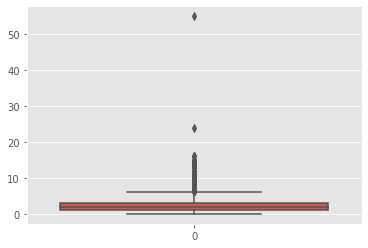

In [63]:
sns.boxplot(leadscore_df['PagesPerVisit']);

In [64]:
leadscore_df['PagesPerVisit'].describe([0,0.05,0.25,0.5,0.75,0.9,0.95,0.99])

count    9099.000000
mean        2.360701
std         2.157994
min         0.000000
0%          0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: PagesPerVisit, dtype: float64

### Replace null values

In [65]:
#replace null values with value 2.0 in leadPagesPerVisit_df
print('Number of observations with null values in column PagesPerVisit: {0}'.format(
    leadscore_df['PagesPerVisit'].isnull().sum()))
leadscore_df['PagesPerVisit'].replace({np.NaN:pagesvist_med},inplace=True)
print('Number of observations with null values in column PagesPerVisit: {0}'.format(
    leadscore_df['PagesPerVisit'].isnull().sum()))

Number of observations with null values in column PagesPerVisit: 137
Number of observations with null values in column PagesPerVisit: 0


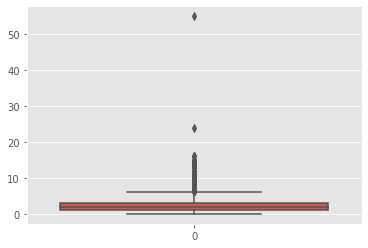

In [66]:
sns.boxplot(leadscore_df['PagesPerVisit']);

In [67]:
#outliers
leadscore_df['PagesPerVisit'].describe([0,0.05,0.25,0.5,0.75,0.9,0.95,0.99])

count    9236.000000
mean        2.355351
std         2.142371
min         0.000000
0%          0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: PagesPerVisit, dtype: float64

TotalVisits 99th percentile value: 9.0


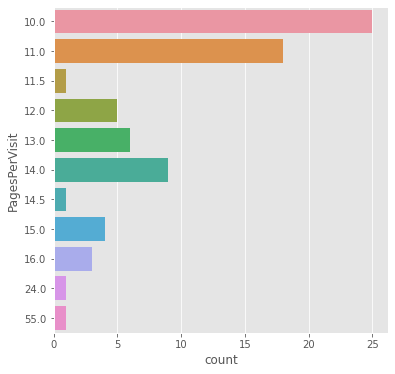

In [68]:
print('TotalVisits 99th percentile value: {0}'.format(leadscore_df['PagesPerVisit'].quantile(0.99)))
plt.figure(figsize=(6,6));
sns.countplot(y=leadscore_df[leadscore_df['PagesPerVisit']>9]['PagesPerVisit'].sort_values());

In [69]:
leadscore_df[leadscore_df['PagesPerVisit']>16]['PagesPerVisit'].count()

2

### Lets drop these 2 rows where PagesPerVisit>16

In [70]:
#Since data values are gradually increasing so we will keep the upper limit of data till 16. We will drop the remaining rows with PagesPerVisit>16
print('shape of dataframe before dropping rows: {0}'.format(leadscore_df.shape))
print('Total number of rows to be dropped: {0}'.format(
    leadscore_df[leadscore_df['PagesPerVisit']>16]['PagesPerVisit'].count()))
leadscore_df.drop(index=leadscore_df[leadscore_df['PagesPerVisit']>16].index,inplace=True)
print('shape of dataframe after dropping rows: {0}'.format(leadscore_df.shape))

shape of dataframe before dropping rows: (9236, 25)
Total number of rows to be dropped: 2
shape of dataframe after dropping rows: (9234, 25)


## 6.4. Combine different categorical values of a feature into one<a id='Combine many category values'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## 7. Lets check for column LastActivity

In [71]:
leadscore_df['LastActivity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          634
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: LastActivity, dtype: int64

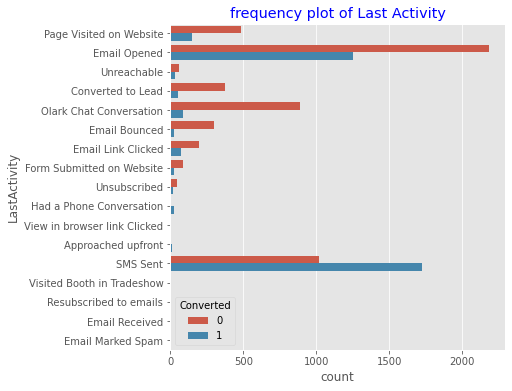

In [72]:
plt.figure(figsize=(6,6))
plt.title('frequency plot of Last Activity',color='blue')
sns.countplot(y='LastActivity',hue='Converted',data=leadscore_df);

### Since many below categories have very less observations so lets combine the below categories and create new category value - Others

In [73]:
leadscore_df['LastActivity'] = leadscore_df['LastActivity'].replace(
    ['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked',
     'Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Others')
leadscore_df['LastActivity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       634
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: LastActivity, dtype: int64

In [74]:
leadscore_df['LastActivity'].isnull().sum()

103

In [75]:
## replace null values
print('Number of observations with null values in column LastActivity: {0}'.format(
    leadscore_df['LastActivity'].isnull().sum()))

# Use SimpleImputer class to impute missing values
imp = SimpleImputer(missing_values=np.NaN, strategy= 'most_frequent')
imp.fit(leadscore_df[['LastActivity']])

print('Most frequent value is : {0}'.format(imp.statistics_[0]))

leadscore_df['LastActivity'] = imp.transform(leadscore_df[['LastActivity']]).ravel()

print('Number of observations with null values in column LastActivity after imputation: {0}'.format(
    leadscore_df['LastActivity'].isnull().sum()))

Number of observations with null values in column LastActivity: 103
Most frequent value is : Email Opened
Number of observations with null values in column LastActivity after imputation: 0


In [76]:
leadscore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9234 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Converted            9234 non-null   int64  
 1   ProspectId           9234 non-null   object 
 2   LeadNumber           9234 non-null   int64  
 3   LeadOrigin           9234 non-null   object 
 4   LeadSource           9234 non-null   object 
 5   DndEmail             9234 non-null   object 
 6   DndCall              9234 non-null   object 
 7   TotalVisits          9234 non-null   float64
 8   TotalWebsiteTime     9234 non-null   int64  
 9   PagesPerVisit        9234 non-null   float64
 10  LastActivity         9234 non-null   object 
 11  Occupation           9234 non-null   object 
 12  Search               9234 non-null   object 
 13  Magazine             9234 non-null   object 
 14  PaperArticle         9234 non-null   object 
 15  EducationForum       9234 non-null   o

In [77]:
leadscore_df.nunique()

Converted                 2
ProspectId             9234
LeadNumber             9234
LeadOrigin                5
LeadSource                9
DndEmail                  2
DndCall                   2
TotalVisits              36
TotalWebsiteTime       1730
PagesPerVisit           108
LastActivity              9
Occupation                6
Search                    2
Magazine                  1
PaperArticle              2
EducationForum            2
Newspaper                 2
DigitalAd                 2
Recommendation            2
ReceiveCourseUpdate       1
UpdateSupplyChain         1
UpdateDMContent           1
ChequePayment             1
FreeCopy                  2
LastNotableActivity      16
dtype: int64

## 4.5 Drop columns with only one categorical value

In [78]:
leadscore_df['Magazine'].value_counts()

No    9234
Name: Magazine, dtype: int64

In [79]:
leadscore_df['ReceiveCourseUpdate'].value_counts()

No    9234
Name: ReceiveCourseUpdate, dtype: int64

In [80]:
leadscore_df['UpdateSupplyChain'].value_counts()

No    9234
Name: UpdateSupplyChain, dtype: int64

In [81]:
leadscore_df['UpdateDMContent'].value_counts()

No    9234
Name: UpdateDMContent, dtype: int64

In [82]:
leadscore_df['ChequePayment'].value_counts()

No    9234
Name: ChequePayment, dtype: int64

In [83]:
##Since below listed columns dont add any variance in data so it wont be helpful in modeling. Based on this we can drop these columns
print('number of columns before dropping column "Country" are: {0}'.format(leadscore_df.shape[1]))
leadscore_df.drop(columns=['Magazine','ReceiveCourseUpdate','UpdateSupplyChain','UpdateDMContent',
                           'ChequePayment'], inplace=True)
print('number of columns after dropping column "Country" are: {0}'.format(leadscore_df.shape[1]))

number of columns before dropping column "Country" are: 25
number of columns after dropping column "Country" are: 20


In [84]:
## % of data remaining after cleaning
(leadscore_df.shape[0]/original_rows)*100

99.93506493506493

# 5. Exploratory Data Analysis

In [85]:
leadscore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9234 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Converted            9234 non-null   int64  
 1   ProspectId           9234 non-null   object 
 2   LeadNumber           9234 non-null   int64  
 3   LeadOrigin           9234 non-null   object 
 4   LeadSource           9234 non-null   object 
 5   DndEmail             9234 non-null   object 
 6   DndCall              9234 non-null   object 
 7   TotalVisits          9234 non-null   float64
 8   TotalWebsiteTime     9234 non-null   int64  
 9   PagesPerVisit        9234 non-null   float64
 10  LastActivity         9234 non-null   object 
 11  Occupation           9234 non-null   object 
 12  Search               9234 non-null   object 
 13  PaperArticle         9234 non-null   object 
 14  EducationForum       9234 non-null   object 
 15  Newspaper            9234 non-null   o

## 5.1 Check for class imbalance

In [86]:
leadscore_df['Converted'].value_counts()

0    5675
1    3559
Name: Converted, dtype: int64

In [87]:
leadscore_df['Converted'].value_counts(1)

0    0.614577
1    0.385423
Name: Converted, dtype: float64

In [88]:
# Print percentage Value "0" and "1" in Target column
print('Value "0" in Target column percentage: {0:.2%}'.format(leadscore_df['Converted'].value_counts(1)[0]))
print('Value "1" in Target column percentage: {0:.2%}'.format(leadscore_df['Converted'].value_counts(1)[1]))

Value "0" in Target column percentage: 61.46%
Value "1" in Target column percentage: 38.54%


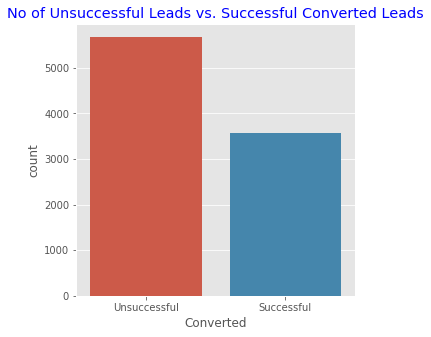

In [693]:
plt.figure(figsize=(5,5))
sns.countplot(leadscore_df['Converted']);
plt.title('No of Unsuccessful Leads vs. Successful Converted Leads',color='blue')
plt.xticks(np.arange(2),('Unsuccessful','Successful'));
#plt.legend(['0 - non-Converted','1 - Converted']);

## 5.2 Lets plot Lead Origin

In [89]:
leadscore_df['LeadOrigin'].value_counts()

Landing Page Submission    4881
API                        3579
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: LeadOrigin, dtype: int64

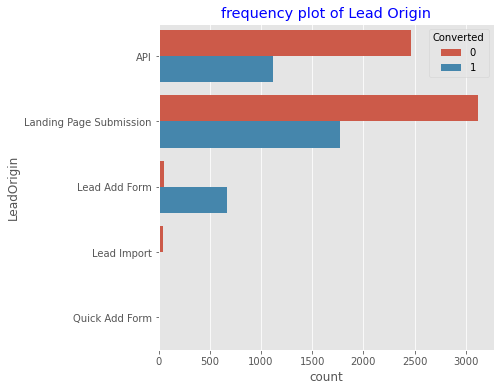

In [90]:
plt.figure(figsize=(6,6))
plt.title('frequency plot of Lead Origin',color='blue')
sns.countplot(y='LeadOrigin',hue='Converted',data=leadscore_df);

In [91]:
crosstab_df = pd.crosstab(leadscore_df['Converted'],
            leadscore_df['LeadOrigin']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

LeadOrigin,API,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form
Converted,,,,,
0,68.87,63.8,7.52,76.36,0.0
1,31.13,36.2,92.48,23.64,100.0


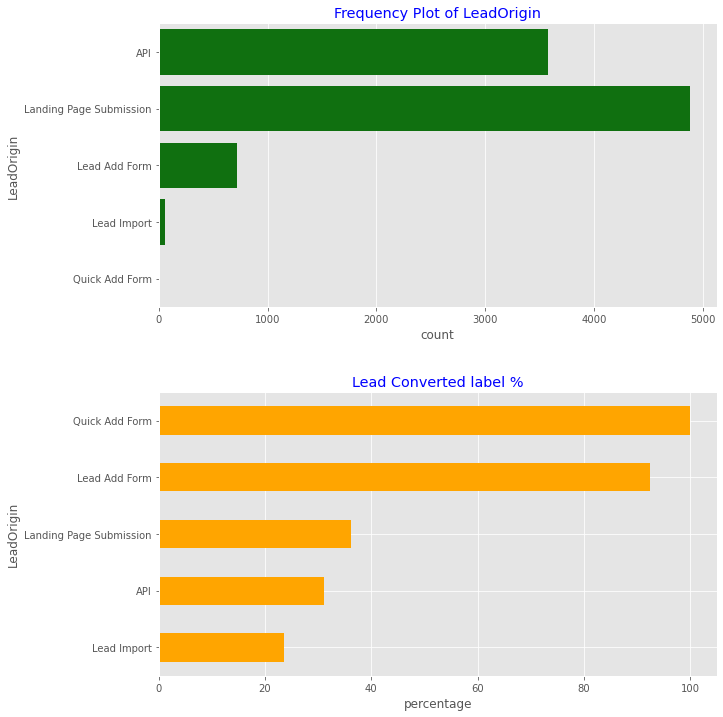

In [92]:
plot_frequency_and_percentage('LeadOrigin',crosstab_df,leadscore_df.sort_values(
    by='LeadOrigin',ascending=False),True,6)

## 5.3 Lets plot Lead Source

In [93]:
leadscore_df['LeadSource'].value_counts()

Google              2909
Direct Traffic      2539
Olark Chat          1755
Organic Search      1153
Reference            534
Welingak Website     142
Referral Sites       124
Facebook              55
Others                23
Name: LeadSource, dtype: int64

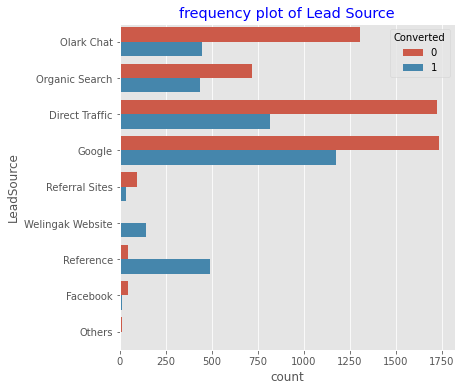

In [94]:
plt.figure(figsize=(6,6))
plt.title('frequency plot of Lead Source',color='blue')
sns.countplot(y='LeadSource',hue='Converted',data=leadscore_df);

In [95]:
crosstab_df = pd.crosstab(leadscore_df['Converted'],
            leadscore_df['LeadSource']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

LeadSource,Direct Traffic,Facebook,Google,Olark Chat,Organic Search,Others,Reference,Referral Sites,Welingak Website
Converted,,,,,,,,,
0,67.82,76.36,59.57,74.47,62.27,60.87,8.24,75.0,1.41
1,32.18,23.64,40.43,25.53,37.73,39.13,91.76,25.0,98.59


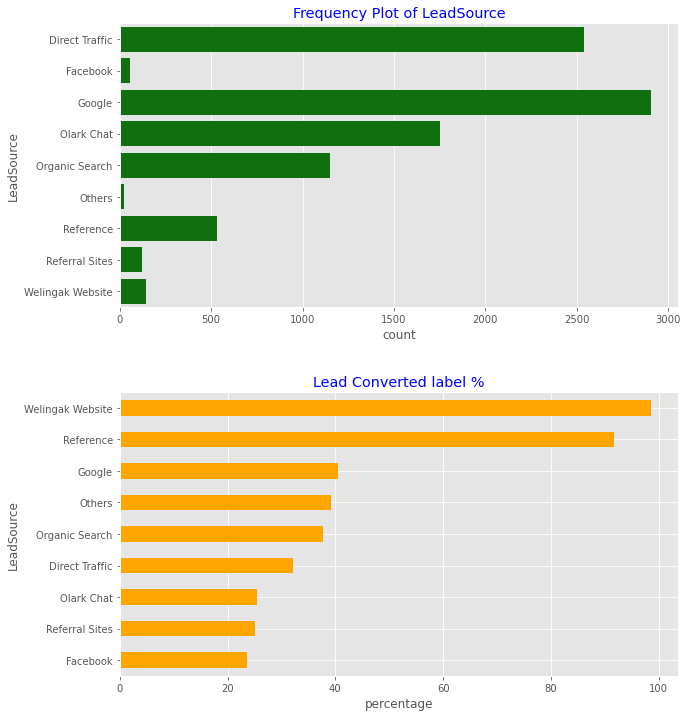

In [96]:
plot_frequency_and_percentage('LeadSource',crosstab_df,leadscore_df.sort_values(
    by='LeadSource',ascending=False),True,6)

## 5.4 Lets plot Occupation

In [97]:
leadscore_df['Occupation'].value_counts()

Unemployed              5596
Other                   2704
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

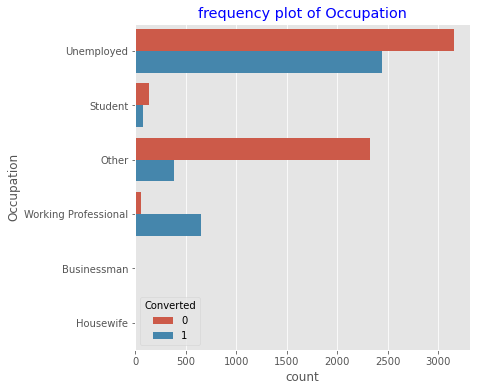

In [98]:
plt.figure(figsize=(6,6))
plt.title('frequency plot of Occupation',color='blue')
sns.countplot(y='Occupation',hue='Converted',data=leadscore_df);

In [99]:
crosstab_df = pd.crosstab(leadscore_df['Converted'],
            leadscore_df['Occupation']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

Occupation,Businessman,Housewife,Other,Student,Unemployed,Working Professional
Converted,,,,,,
0,37.5,0.0,85.98,62.86,56.4,8.36
1,62.5,100.0,14.02,37.14,43.6,91.64


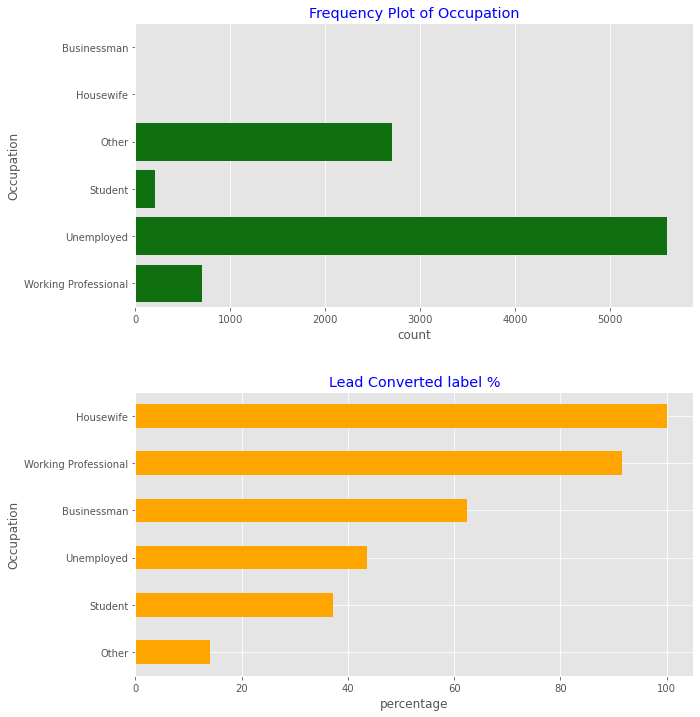

In [100]:
plot_frequency_and_percentage('Occupation',crosstab_df,leadscore_df.sort_values(
    by='Occupation',ascending=False),True,6)

## 5.5 Lets plot Last Acitivity

In [101]:
leadscore_df['LastActivity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       634
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: LastActivity, dtype: int64

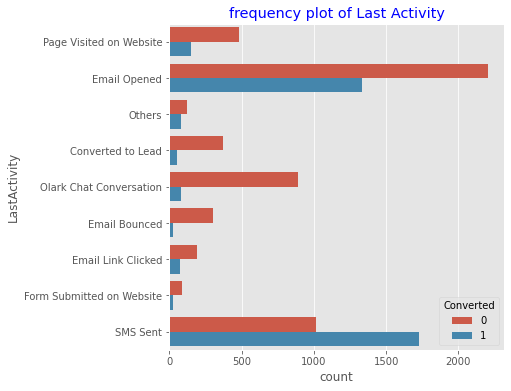

In [102]:
plt.figure(figsize=(6,6))
plt.title('frequency plot of Last Activity',color='blue')
sns.countplot(y='LastActivity',hue='Converted',data=leadscore_df);

In [103]:
crosstab_df = pd.crosstab(leadscore_df['Converted'],
            leadscore_df['LastActivity']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

LastActivity,Converted to Lead,Email Bounced,Email Link Clicked,Email Opened,Form Submitted on Website,Olark Chat Conversation,Others,Page Visited on Website,SMS Sent
Converted,,,,,,,,,
0,87.38,92.02,72.66,62.32,75.86,91.37,59.02,76.5,37.09
1,12.62,7.98,27.34,37.68,24.14,8.63,40.98,23.5,62.91


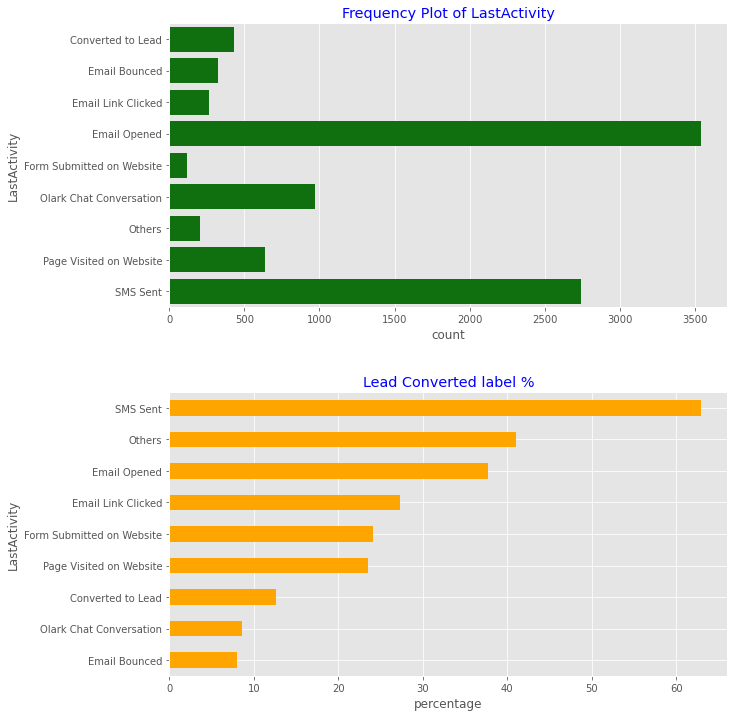

In [104]:
plot_frequency_and_percentage('LastActivity',crosstab_df,leadscore_df.sort_values(
    by='LastActivity',ascending=False),True,6)

## 5.6 Lets plot Do not email

In [105]:
leadscore_df['DndEmail'].value_counts()

No     8504
Yes     730
Name: DndEmail, dtype: int64

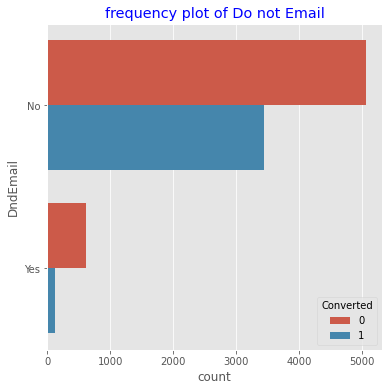

In [106]:
plt.figure(figsize=(6,6))
plt.title('frequency plot of Do not Email',color='blue')
sns.countplot(y='DndEmail',hue='Converted',data=leadscore_df);

In [107]:
crosstab_df = pd.crosstab(leadscore_df['Converted'],
            leadscore_df['DndEmail']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

DndEmail,No,Yes
Converted,,
0,59.54,83.84
1,40.46,16.16


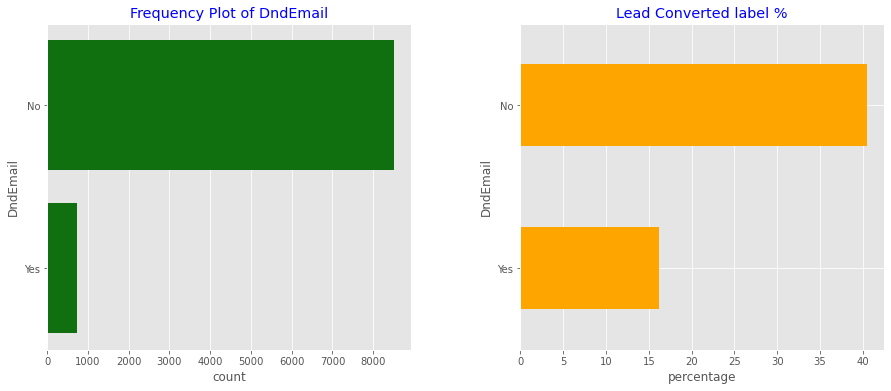

In [108]:
plot_frequency_and_percentage('DndEmail',crosstab_df,leadscore_df.sort_values(
    by='DndEmail',ascending=False),False,6)

## Lets check other categorical features

In [109]:
leadscore_df['DndCall'].value_counts()

No     9232
Yes       2
Name: DndCall, dtype: int64

In [110]:
leadscore_df['Search'].value_counts()

No     9220
Yes      14
Name: Search, dtype: int64

In [111]:
leadscore_df['PaperArticle'].value_counts()

No     9232
Yes       2
Name: PaperArticle, dtype: int64

In [112]:
leadscore_df['EducationForum'].value_counts()

No     9233
Yes       1
Name: EducationForum, dtype: int64

In [113]:
leadscore_df['Newspaper'].value_counts()

No     9233
Yes       1
Name: Newspaper, dtype: int64

In [114]:
leadscore_df['DigitalAd'].value_counts()

No     9230
Yes       4
Name: DigitalAd, dtype: int64

In [115]:
leadscore_df['Recommendation'].value_counts()

No     9227
Yes       7
Name: Recommendation, dtype: int64

In [116]:
leadscore_df['FreeCopy'].value_counts()

No     6349
Yes    2885
Name: FreeCopy, dtype: int64

In [117]:
##Since there is very less variation in data values in the below features, so we can drop these features below
print('number of columns before dropping column "Country" are: {0}'.format(leadscore_df.shape[1]))
leadscore_df.drop(columns=['DndCall','Search','PaperArticle','EducationForum','Newspaper',
                           'DigitalAd','Recommendation'],inplace=True)
print('number of columns after dropping column "Country" are: {0}'.format(leadscore_df.shape[1]))

number of columns before dropping column "Country" are: 20
number of columns after dropping column "Country" are: 13


## Lets plot feature - a free copy of Mastering The Interview

In [118]:
leadscore_df['FreeCopy'].value_counts()

No     6349
Yes    2885
Name: FreeCopy, dtype: int64

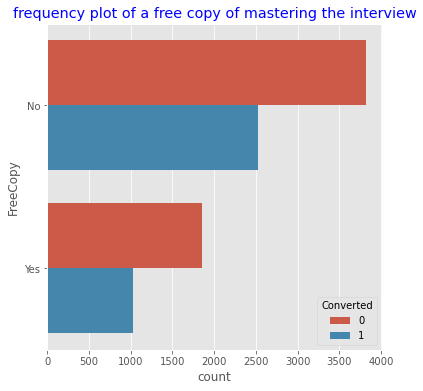

In [119]:
plt.figure(figsize=(6,6))
plt.title('frequency plot of a free copy of mastering the interview',color='blue')
sns.countplot(y='FreeCopy',hue='Converted',data=leadscore_df);

In [120]:
crosstab_df = pd.crosstab(leadscore_df['Converted'],
            leadscore_df['FreeCopy']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

FreeCopy,No,Yes
Converted,,
0,60.15,64.33
1,39.85,35.67


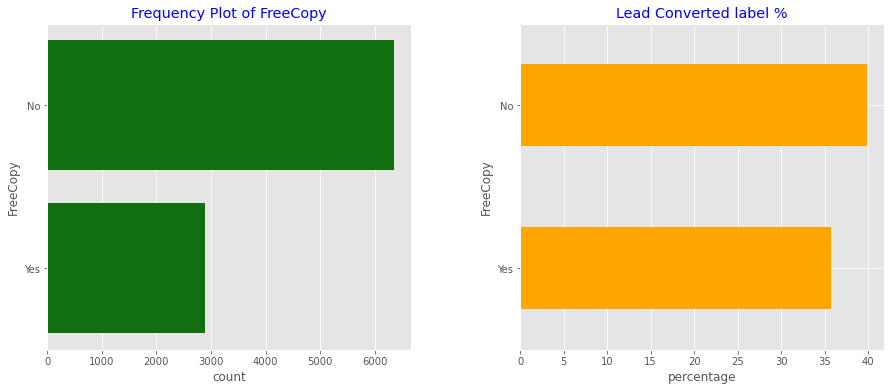

In [121]:
plot_frequency_and_percentage('FreeCopy',crosstab_df,leadscore_df.sort_values(
    by='FreeCopy',ascending=False),False,6)

In [122]:
leadscore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9234 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Converted            9234 non-null   int64  
 1   ProspectId           9234 non-null   object 
 2   LeadNumber           9234 non-null   int64  
 3   LeadOrigin           9234 non-null   object 
 4   LeadSource           9234 non-null   object 
 5   DndEmail             9234 non-null   object 
 6   TotalVisits          9234 non-null   float64
 7   TotalWebsiteTime     9234 non-null   int64  
 8   PagesPerVisit        9234 non-null   float64
 9   LastActivity         9234 non-null   object 
 10  Occupation           9234 non-null   object 
 11  FreeCopy             9234 non-null   object 
 12  LastNotableActivity  9234 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.2+ MB


# 6. Data Preparation for modeling

In [123]:
## Lets drop LeadNumber and ProspectId as they dont add any value
print('No. of columns before dropping 2 columns: {0}'.format(leadscore_df.shape[1]))
leadscore_df.drop(columns = ['ProspectId','LeadNumber'],inplace=True)
print('No. of columns after dropping 2 columns: {0}'.format(leadscore_df.shape[1]))

No. of columns before dropping 2 columns: 13
No. of columns after dropping 2 columns: 11


## 6.1 Dummy encoding for all the categorical columns

In [124]:
leadscore_df.head()

,Converted,LeadOrigin,LeadSource,DndEmail,TotalVisits,TotalWebsiteTime,PagesPerVisit,LastActivity,Occupation,FreeCopy,LastNotableActivity
0,0,API,Olark Chat,No,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,0,API,Organic Search,No,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,1,Landing Page Submission,Direct Traffic,No,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,0,Landing Page Submission,Direct Traffic,No,1.0,305,1.0,Others,Unemployed,No,Modified
4,1,Landing Page Submission,Google,No,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [125]:
object_cols = [col for col in leadscore_df.select_dtypes(include=np.object).columns]
numerical_cols = [col for col in leadscore_df.select_dtypes(include=np.number).columns]

print('Categorical Columns: \n{0}\n'.format(object_cols))
print('Numerical Columns: \n{0}'.format(numerical_cols))
            

Categorical Columns: 
['LeadOrigin', 'LeadSource', 'DndEmail', 'LastActivity', 'Occupation', 'FreeCopy', 'LastNotableActivity']

Numerical Columns: 
['Converted', 'TotalVisits', 'TotalWebsiteTime', 'PagesPerVisit']


In [126]:
## Remove Converted from Numerical Columns list
numerical_cols.remove('Converted')
numerical_cols

['TotalVisits', 'TotalWebsiteTime', 'PagesPerVisit']

In [127]:
#one hot encoding for categorical variables
leadscore_df = pd.get_dummies(data=leadscore_df,columns=object_cols,drop_first=True)
leadscore_df.sample(10)

,Converted,TotalVisits,TotalWebsiteTime,PagesPerVisit,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,DndEmail_Yes,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,LastActivity_SMS Sent,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,FreeCopy_Yes,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
3023,0,2.0,83,2.00,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4058,1,0.0,0,0.00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4933,0,0.0,0,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7886,0,3.0,452,3.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1688,0,2.0,11,2.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2437,0,5.0,66,2.50,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
966,0,6.0,543,6.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1562,1,2.0,345,2.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1953,1,13.0,1219,2.17,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5255,1,9.0,1022,1.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## 6.2 Check Correlation

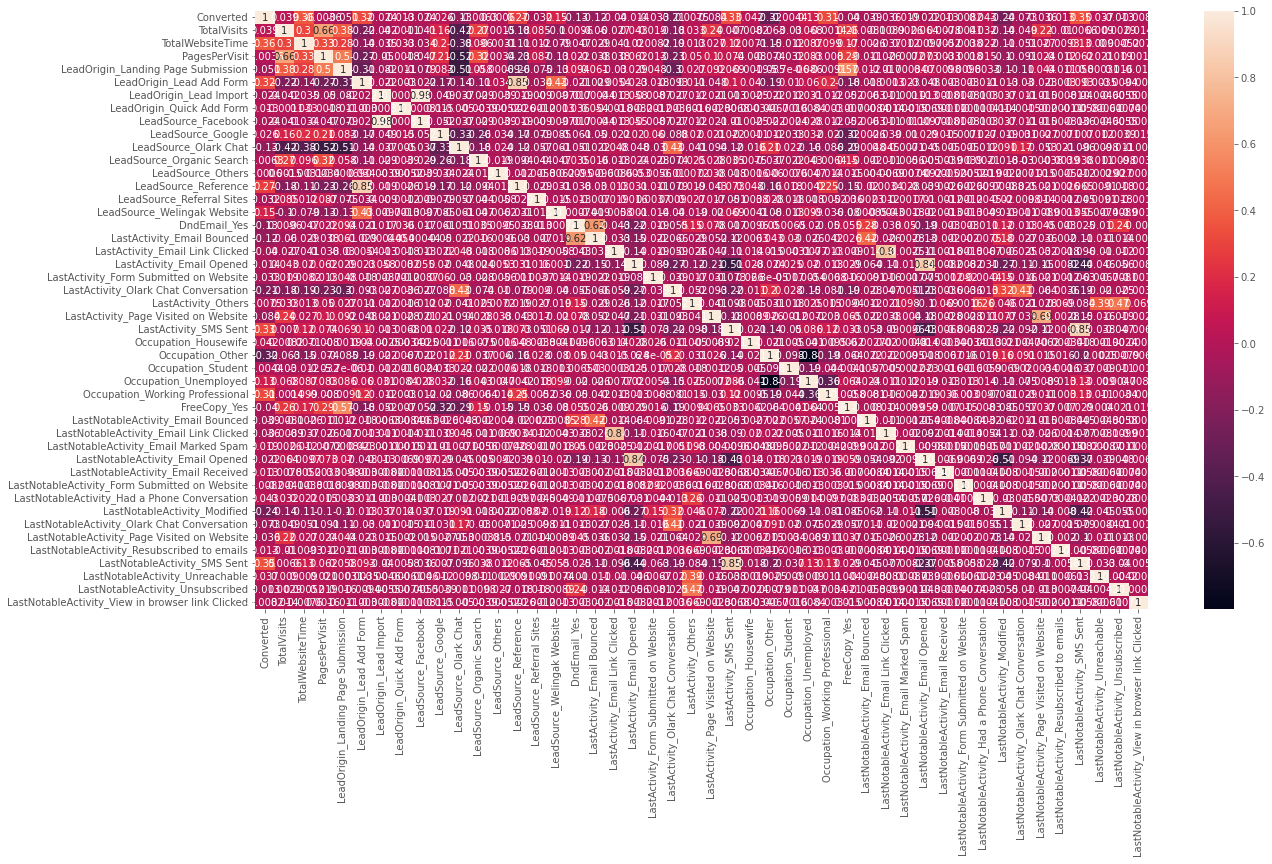

In [128]:
plt.figure(figsize=(20,11))
sns.heatmap(leadscore_df.corr(),annot=True);

In [129]:
leadscore_corr = leadscore_df.corr()
leadscore_corr.style.apply(lambda x: 
                           ["background: lightblue" if abs(v) > 0.5
                            else  
                            ("background: lightyellow" if abs(v) > 0.3 
                             else "" ) for v in x], axis = 1)
#leadscore_corr.style.apply(lambda x: ["background: lightblue" if abs(v) > 0.5 else "" for v in x], axis = 1)



,Converted,TotalVisits,TotalWebsiteTime,PagesPerVisit,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,DndEmail_Yes,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,LastActivity_SMS Sent,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,FreeCopy_Yes,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
Converted,1.000000,0.038621,0.362653,-0.003631,-0.050928,0.321790,-0.023708,0.013142,-0.023708,0.026251,-0.129543,-0.006323,0.000604,0.270902,-0.032463,0.154193,-0.134714,-0.120147,-0.039715,-0.013912,-0.033382,-0.210906,0.007533,-0.083909,0.325700,0.041578,-0.324278,-0.004387,0.128950,0.313922,-0.039821,-0.039119,-0.035576,0.018586,-0.022011,0.013142,-0.008242,0.043487,-0.244604,-0.072693,-0.035632,0.013142,0.351950,0.036601,-0.012867,-0.008242
TotalVisits,0.038621,1.000000,0.300954,0.659709,0.382163,-0.220402,-0.042223,-0.001095,-0.040619,0.156156,-0.415879,0.272787,0.001550,-0.184661,0.085013,-0.103152,0.009643,-0.059747,-0.026626,0.043039,0.019430,-0.184012,0.033139,0.238107,0.006953,-0.008154,-0.062560,-0.029502,0.067607,-0.001369,0.262393,-0.008126,-0.008852,0.002644,0.063500,0.007799,-0.004060,0.031579,-0.136371,-0.048606,0.221954,-0.009989,0.006595,0.009018,0.002878,0.013728
TotalWebsiteTime,0.362653,0.300954,1.000000,0.325858,0.276398,-0.139672,-0.034922,0.032845,-0.033926,0.200087,-0.376827,0.095658,-0.003141,-0.107348,0.011918,-0.078544,-0.046809,-0.028512,-0.041333,0.020150,0.008167,-0.191668,0.013206,0.027385,0.117422,0.007098,-0.148420,-0.012490,0.086777,0.099342,0.168731,-0.002619,-0.037097,0.011682,0.009734,0.005193,-0.003809,0.022278,-0.107110,-0.051390,0.026586,-0.009260,0.125254,0.008957,0.000519,-0.007570
PagesPerVisit,-0.003631,0.659709,0.325858,1.000000,0.502731,-0.270392,-0.049969,-0.001755,-0.047235,0.212171,-0.517372,0.317153,0.003442,-0.226231,0.087250,-0.125270,0.022157,-0.037655,-0.038156,0.061917,0.012766,-0.233478,0.050044,0.103374,0.073574,-0.007953,-0.073943,-0.032499,0.082598,-0.008022,0.286819,-0.010735,-0.025600,-0.007237,0.073396,0.003299,-0.001755,0.014921,-0.104894,-0.090570,0.023807,-0.011865,0.062001,0.020851,0.019348,0.001631
LeadOrigin_Landing Page Submission,-0.050928,0.382163,0.276398,0.502731,1.000000,-0.307471,-0.081968,-0.011020,-0.079148,0.082818,-0.512952,0.058105,-0.000686,-0.262344,-0.074536,-0.132335,0.094175,0.060752,-0.029950,0.028910,0.048081,-0.303352,0.027445,0.091689,0.068835,-0.001886,-0.085483,-0.000006,0.085694,-0.009131,0.569656,0.011569,-0.016714,-0.000843,0.070454,0.009828,0.009828,0.003344,-0.101556,-0.114769,0.044316,-0.011020,0.057750,0.000314,0.015720,-0.011020
LeadOrigin_Lead Add Form,0.321790,-0.220402,-0.139672,-0.270392,-0.307471,1.000000,-0.022476,-0.003022,-0.022476,-0.167319,-0.138595,-0.109680,0.034170,0.853231,-0.033876,0.430398,-0.020626,-0.029251,0.005404,0.023076,-0.018227,-0.093066,0.011144,-0.048453,0.104903,0.039622,-0.185960,0.009959,0.060315,0.196483,-0.180900,-0.018449,-0.001348,0.023208,-0.048098,-0.003022,-0.003022,-0.011315,-0.013210,-0.029681,-0.023240,-0.003022,0.092597,

### Observations from above correlation map
- TotalWebsiteTime, LeadOrigin_Lead Add Form, LastActivity_SMS Sent, Occupation_Working Professional, LastNotableActivity_SMS Sent features have positive correlation with target variable Converted
- There are many dummy variables that are correlated with each other

## 6.3 Divide into X and Y for model building

In [130]:
X = leadscore_df.drop(columns = ['Converted'])
y = leadscore_df['Converted']

In [131]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [132]:
X_train.head()

,TotalVisits,TotalWebsiteTime,PagesPerVisit,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,DndEmail_Yes,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,LastActivity_SMS Sent,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,FreeCopy_Yes,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
7417,2.0,1601,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1032,6.0,1377,6.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6537,4.0,313,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7284,4.0,104,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3194,0.0,0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## 6.4 Feature Scaling

In [133]:
sc = StandardScaler()
#sc = MinMaxScaler()

#Create X_train_scaled, X_test_scaled
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

#Fit and transform Train
X_train_scaled[numerical_cols] = sc.fit_transform(X_train[numerical_cols])

#Transform Test (No Fit)
X_test_scaled[numerical_cols] = sc.transform(X_test[numerical_cols])

In [134]:
X_train_scaled.head()

,TotalVisits,TotalWebsiteTime,PagesPerVisit,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,DndEmail_Yes,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,LastActivity_SMS Sent,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,FreeCopy_Yes,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
7417,-0.390363,2.031860,-0.167020,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1032,0.763894,1.623276,1.774942,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6537,0.186765,-0.317501,0.803961,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7284,0.186765,-0.698725,-0.167020,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3194,-0.967491,-0.888425,-1.138001,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [135]:
## get features list first and remove target column from features list
features = [col for col in leadscore_df if col!='Converted']
features

['TotalVisits',
 'TotalWebsiteTime',
 'PagesPerVisit',
 'LeadOrigin_Landing Page Submission',
 'LeadOrigin_Lead Add Form',
 'LeadOrigin_Lead Import',
 'LeadOrigin_Quick Add Form',
 'LeadSource_Facebook',
 'LeadSource_Google',
 'LeadSource_Olark Chat',
 'LeadSource_Organic Search',
 'LeadSource_Others',
 'LeadSource_Reference',
 'LeadSource_Referral Sites',
 'LeadSource_Welingak Website',
 'DndEmail_Yes',
 'LastActivity_Email Bounced',
 'LastActivity_Email Link Clicked',
 'LastActivity_Email Opened',
 'LastActivity_Form Submitted on Website',
 'LastActivity_Olark Chat Conversation',
 'LastActivity_Others',
 'LastActivity_Page Visited on Website',
 'LastActivity_SMS Sent',
 'Occupation_Housewife',
 'Occupation_Other',
 'Occupation_Student',
 'Occupation_Unemployed',
 'Occupation_Working Professional',
 'FreeCopy_Yes',
 'LastNotableActivity_Email Bounced',
 'LastNotableActivity_Email Link Clicked',
 'LastNotableActivity_Email Marked Spam',
 'LastNotableActivity_Email Opened',
 'LastNotabl

# 7. Data Modeling

## 7.1 Logistic Regression Model using stats model using all features

In [139]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_scaled)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6420
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 01 Oct 2023   Deviance:                   1.3981e+05
Time:                        20:34:00   Pearson chi2:                 6.84e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                            -5.786e+14   2.75e+07   -2.1e+07      0.000   -5.79e+14   -5.79e+14
TotalVisits                                       5.112e+13    1.2e+06   4.27e+07      0.000    5.11e+13    5.11e+13
TotalWebsiteTime                                    8.4e+14   9.48e+05   8.86e+08      0.000     8.4e+14     8.4e+14
PagesPerVisit                                    -8.459e+13   1.32e+06  -6.41e+07      0.000   -8.46e+13   -8.46e+13
LeadOrigin_Landing Page Submission               -2.734e+14   2.65e+06  -1.03e+08      0.000   -2.73e+14   -2.73e+14
LeadOrigin_Lead Add Form                          1.324e+15   1.26e+07   1.05e+08      0.000    1.32e+15    1.32e+15
LeadOrigin_Lead Import                             8.25e+14    4.8e+07   1.72e+07      0.000    8.25e+14    8.25e+14
LeadOrigin_Quick Add Form                           -5.5952   2.44e-07   -2.3e+07      0.000      -5.595      -5.595
LeadSource_Facebook                              -1.443e+15    4.8e+07  -3.01e+07      0.000   -1.44e+15   -1.44e+15
LeadSource_Google                                 2.934e+14    2.8e+06   1.05e+08      0.000    2.93e+14    2.93e+14
LeadSource_Olark Chat                             6.994e+14   3.91e+06   1.79e+08      0.000    6.99e+14    6.99e+14
LeadSource_Organic Search                         6.133e+13   3.17e+06   1.94e+07      0.000    6.13e+13    6.13e+13
LeadSource_Others                                 5.514e+14   1.55e+07   3.56e+07      0.000    5.51e+14    5.51e+14
LeadSource_Reference                             -3.707e+14   1.32e+07  -2.82e+07      0.000   -3.71e+14   -3.71e+14
LeadSource_Referral Sites                         1.058e+14   7.66e+06   1.38e+07      0.000    1.06e+14    1.06e+14
LeadSource_Welingak Website                       1.027e+15   1.43e+07    7.2e+07      0.000    1.03e+15    1.03e+15
DndEmail_Yes                                     -1.449e+14   4.27e+06  -3.39e+07      0.000   -1.45e+14   -1.45e+14
LastActivity_Email Bounced                       -4.717e+14   7.36e+06  -6.41e+07      0.000   -4.72e+14   -4.72e+14
LastActivity_Email Link Clicked                   2.539e+14   9.54e+06   2.66e+07      0.000    2.54e+14    2.54e+14
LastActivity_Email Opened                         2.879e+14   5.09e+06   5.65e+07      0.000    2.88e+14    2.88e+14
LastActivity_Form Submitted on Website              2.7e+14   8.69e+06   3.11e+07      0.000     2.7e+14     2.7e+14
LastActivity_Olark Chat Conversation              6.917e+13   5.16e+06   1.34e+07      0.000    6.92e+13    6.92e+13
LastActivity_Others                               2.113e+13   9.13e+06   2.31e+06      0.000    2.11e+13    2.11e+13
LastActivity_Page Visited on Website     

### Observations from stats model for logistic regression
- Log-likelihood is nan. It could be due to presence of unimportant features or highly correlated features
- We will use RFE to select first 15 important features and will then check for accuracy of the model

In [150]:
logreg = LogisticRegression()

In [152]:
#Top 15 columns
rfe = RFE(logreg,n_features_to_select=15)
rfe.fit(X_train_scaled, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [153]:
#List all features with importance/ranking
list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 21),
 ('TotalWebsiteTime', True, 1),
 ('PagesPerVisit', False, 22),
 ('LeadOrigin_Landing Page Submission', False, 10),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 26),
 ('LeadOrigin_Quick Add Form', False, 30),
 ('LeadSource_Facebook', False, 12),
 ('LeadSource_Google', False, 19),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 23),
 ('LeadSource_Others', False, 14),
 ('LeadSource_Reference', False, 13),
 ('LeadSource_Referral Sites', False, 24),
 ('LeadSource_Welingak Website', True, 1),
 ('DndEmail_Yes', True, 1),
 ('LastActivity_Email Bounced', False, 18),
 ('LastActivity_Email Link Clicked', False, 7),
 ('LastActivity_Email Opened', True, 1),
 ('LastActivity_Form Submitted on Website', False, 4),
 ('LastActivity_Olark Chat Conversation', False, 17),
 ('LastActivity_Others', True, 1),
 ('LastActivity_Page Visited on Website', False, 6),
 ('LastActivity_SMS Sent', True, 1),
 ('Occupation_Housewife', F

In [154]:
## List of 15 important features filtered by RFE
rfe_col = list(X_train_scaled.columns[rfe.support_])
rfe_col

['TotalWebsiteTime',
 'LeadOrigin_Lead Add Form',
 'LeadSource_Olark Chat',
 'LeadSource_Welingak Website',
 'DndEmail_Yes',
 'LastActivity_Email Opened',
 'LastActivity_Others',
 'LastActivity_SMS Sent',
 'Occupation_Other',
 'Occupation_Working Professional',
 'LastNotableActivity_Had a Phone Conversation',
 'LastNotableActivity_Modified',
 'LastNotableActivity_Olark Chat Conversation',
 'LastNotableActivity_Unreachable',
 'LastNotableActivity_Unsubscribed']

In [155]:
##Now again with the RFE selected features
X_train_scaled_rfe = X_train_scaled[rfe_col]
X_train_scaled_rfe.head()

,TotalWebsiteTime,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,DndEmail_Yes,LastActivity_Email Opened,LastActivity_Others,LastActivity_SMS Sent,Occupation_Other,Occupation_Working Professional,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed
7417,2.031860,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1032,1.623276,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6537,-0.317501,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7284,-0.698725,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3194,-0.888425,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [156]:
X_test_scaled_rfe = X_test_scaled[rfe_col]
X_test_scaled_rfe.head()

,TotalWebsiteTime,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,DndEmail_Yes,LastActivity_Email Opened,LastActivity_Others,LastActivity_SMS Sent,Occupation_Other,Occupation_Working Professional,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed
4871,1.907826,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1949,-0.888425,0,1,0,0,0,0,1,1,0,0,1,0,0,0
5628,1.429927,0,0,0,0,0,0,1,1,0,0,1,0,0,0
8666,-0.846472,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1025,0.838939,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [157]:
##Functions to use RFE on fetures, build model and check VIF
def check_rfe(X_df,y_df,col_list):
    logreg_model1 = LogisticRegression()
    logreg_model1.fit(X_df[col_list],y_df)
    # Use RFE for feature selection
    rfe1 = RFE(logreg_model1,15)
    rfe1.fit(X_train_scaled[col_list],y_df)
    #List all features with importance/ranking
    print(list(zip(col_list,rfe1.support_,rfe1.ranking_)))

In [158]:
def build_statsmodel(X_df,y_df):
    #add constant. Its because intercept might not pass through origin
    #By default its not added in stats model
    #we have to add constant explicitly
    X_train_sm = sm.add_constant(X_df)
    lr = sm.GLM(y_df,X_train_sm, family = sm.families.Binomial()).fit()
    
    ## Print the params obtained
    print('************ feature - coefficients *****************')
    print(round(lr.params,4))
    print('*****************************************************')
    print()
    print()
    ## Print stats model summary
    print(lr.summary())
    return lr,X_train_sm

In [159]:
def check_vif(X_df):
    vif = pd.DataFrame()
    vif['Features'] = X_df.columns
    vif['VIF'] = [variance_inflation_factor(X_df.values,i) for i in range(X_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [160]:
def createfinaldf_and_checkscores(y_df,y_pred_df):
    y_pred_final_df = pd.DataFrame({'Converted':y_df.values, 'Converted_Prob':y_pred_df})
    y_pred_final_df['LeadId'] = y_df.index
    
    
    # Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
    ## this means cut-off set is 0.5
    y_pred_final_df['predicted'] = y_pred_final_df.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
    #print(y_train_pred_final.head())
    
    #Confusion matrix
    cm = confusion_matrix(y_pred_final_df['Converted'],y_pred_final_df['predicted'])
    #print(conf_matrix)
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax,fmt='d'); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['unsuccessfull', 'successfull']); ax.yaxis.set_ticklabels(['unsuccessfull', 'successfull']);
    plt.show();
    
    # Let's check the overall accuracy.
    print('Accuracy score: {0}'.format
          (accuracy_score(y_pred_final_df['Converted'],y_pred_final_df['predicted'])))
    # Let's check sensitivity
    TP = cm[1,1] # true positive 
    TN = cm[0,0] # true negatives
    FP = cm[0,1] # false positives
    FN = cm[1,0] # false negatives
    sensitivity = TP / float(TP+FN)
    print('Sensitivity score: {0}'.format(sensitivity))
    # Lets check f1-score
    print('f1-score: {0}'.format
          (f1_score(y_pred_final_df['Converted'],y_pred_final_df['predicted'])))
    # Lets check precision score
    print('Precision score: {0}'.format
          (precision_score(y_pred_final_df['Converted'],y_pred_final_df['predicted'])))
    # Lets check Recall Score
    print('Recall score: {0}'.format
          (recall_score(y_pred_final_df['Converted'],y_pred_final_df['predicted'])))
    
    return y_pred_final_df, cm
    

In [161]:
# Building updated model using RFE selected features
lr,X_train_sm = build_statsmodel(X_train_scaled_rfe,y_train)

************ feature - coefficients *****************
const                                          -1.3775
TotalWebsiteTime                                1.1260
LeadOrigin_Lead Add Form                        3.4668
LeadSource_Olark Chat                           1.2734
LeadSource_Welingak Website                     2.7337
DndEmail_Yes                                   -1.4522
LastActivity_Email Opened                       0.5113
LastActivity_Others                             0.7213
LastActivity_SMS Sent                           1.6239
Occupation_Other                               -1.0928
Occupation_Working Professional                 2.4069
LastNotableActivity_Had a Phone Conversation    3.1235
LastNotableActivity_Modified                   -0.7430
LastNotableActivity_Olark Chat Conversation    -1.0782
LastNotableActivity_Unreachable                 1.5936
LastNotableActivity_Unsubscribed                1.4706
dtype: float64
***************************************************

In [162]:
### Checking VIF
check_vif(X_train_sm)

,Features,VIF
0,const,8.91
6,LastActivity_Email Opened,2.13
8,LastActivity_SMS Sent,2.02
7,LastActivity_Others,1.92
12,LastNotableActivity_Modified,1.51
15,LastNotableActivity_Unsubscribed,1.48
2,LeadOrigin_Lead Add Form,1.41
14,LastNotableActivity_Unreachable,1.31
3,LeadSource_Olark Chat,1.28
1,TotalWebsiteTime,1.26


##Since all variables have p-value<0.05 and low VIF as well, so we need not drop any feature

In [163]:
y_train_pred = lr.predict(X_train_sm).values.reshape(-1)

In [164]:
y_train_pred[:10]

array([0.92651679, 0.88837938, 0.47225438, 0.16070783, 0.83204449,
       0.05674729, 0.16718224, 0.4027771 , 0.06262168, 0.03621737])

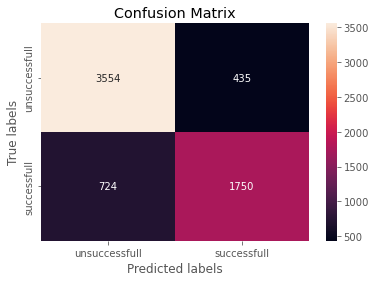

Accuracy score: 0.8206715147764196
Sensitivity score: 0.7073565076798707
f1-score: 0.7512341704228375
Precision score: 0.8009153318077803
Recall score: 0.7073565076798707


In [165]:
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,y_train_pred)
## cutoff at 50%

In [166]:
TP = conf_matrix[1,1] # true positive 
TN = conf_matrix[0,0] # true negatives
FP = conf_matrix[0,1] # false positives
FN = conf_matrix[1,0] # false negatives

In [167]:
### Sensitivity of final logistic regression model
TP / float(TP+FN)

0.7073565076798707

In [168]:
### Specificity of final logistic regression model
TN / float(TN + FP)

0.8909501128102282

## Observations from above classification report
- Accuracy is 82%, precision is 80% and recall is 71%
- This is when cutoff set is 0.5
- We will plot the ROC Curve in next steps and will also try to adjust cutoff to get better precision score

In [169]:
## Create data frame to store cutoff and train-test metrics
result_metrics = pd.DataFrame(columns=['cutoff','train_acc','train_sen','train_spec','train_prec',
                                      'test_acc','test_sen','test_spec','test_prec'])

In [170]:
## Plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [171]:
fpr, tpr, thresholds = roc_curve(y_train_pred_final['Converted'], 
                                         y_train_pred_final['Converted_Prob'], drop_intermediate = False )

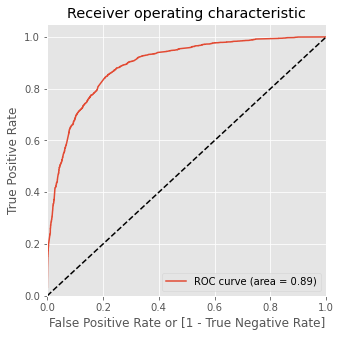

In [172]:
draw_roc(y_train_pred_final['Converted'],y_train_pred_final['Converted_Prob'])

## Finding Optimal Cutoff Point

In [173]:
#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificit, lets try with various cutoff points and try to check which cutoff point gives more stable accuracy, sensitivity and precision score of train and test data
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.926517,7417,1,1,1,1,1,1,1,1,1,1,1
1,1,0.888379,1032,1,1,1,1,1,1,1,1,1,1,0
2,0,0.472254,6537,0,1,1,1,1,1,0,0,0,0,0
3,0,0.160708,7284,0,1,1,0,0,0,0,0,0,0,0
4,1,0.832044,3194,1,1,1,1,1,1,1,1,1,1,0


In [174]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382794  1.000000  0.000000
0.1   0.1  0.637011  0.972514  0.428930
0.2   0.2  0.767291  0.921584  0.671597
0.3   0.3  0.803652  0.867017  0.764352
0.4   0.4  0.816958  0.774454  0.843319
0.5   0.5  0.820672  0.707357  0.890950
0.6   0.6  0.814173  0.644301  0.919529
0.7   0.7  0.788179  0.536378  0.944347
0.8   0.8  0.763423  0.436136  0.966408
0.9   0.9  0.715457  0.278092  0.986713


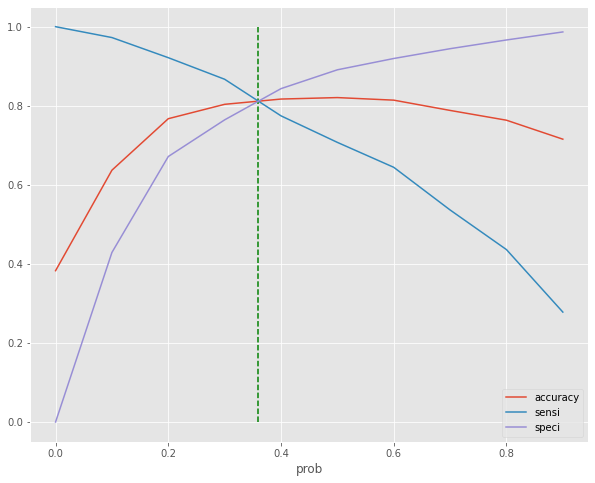

In [175]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(10,8))
plt.vlines(x=0.36, ymax=1, ymin=0, colors="g", linestyles="--")
plt.show()

## Observations from above plot
- Cutoff at 0.36 gives a good accuracy, sensitivity and specificity scores 

##  With 0.36 as cut-off point lets check train and test scores

In [176]:
y_train_pred_final['predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.926517,7417,1,1,1,1,1,1,1,1,1,1,1
1,1,0.888379,1032,1,1,1,1,1,1,1,1,1,1,0
2,0,0.472254,6537,1,1,1,1,1,1,0,0,0,0,0
3,0,0.160708,7284,0,1,1,0,0,0,0,0,0,0,0
4,1,0.832044,3194,1,1,1,1,1,1,1,1,1,1,0


In [177]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.813863530868018

In [178]:
confusion_train = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
confusion_train

array([[3262,  727],
       [ 476, 1998]])

In [179]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

In [180]:
# Let's see the sensitivity of our logistic regression model
TP / (TP+FN)

0.8075990299110751

In [181]:
# Let us calculate specificity
TN / (TN+FP)

0.8177488092253697

In [182]:
#Lets calculate Precision
TP / (TP + FP)

0.7332110091743119

In [183]:
# Lets calculate recall
TP / (TP + FN)

0.8075990299110751

In [184]:
precision_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.7332110091743119

In [185]:
recall_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.8075990299110751

##### F1-Score

In [186]:
f1_score(y_train_pred_final['Converted'],y_train_pred_final['predicted'])

0.7686093479515291

In [187]:
train_acc = accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
train_sen = TP / (TP + FN)
train_spec = TN / (TN + FP)
train_prec = TP / (TP + FP)
result_metrics.loc[0,'cutoff']=0.36
result_metrics.loc[0,'train_acc'] = round(train_acc,2)
result_metrics.loc[0,'train_sen'] = round(train_sen,2)
result_metrics.loc[0,'train_spec'] = round(train_spec,2)
result_metrics.loc[0,'train_prec'] = round(train_prec,2)

## Observations from above
- With cut-off point as 0.36, we have train accuracy of 81.4%, Sensitivity of 81% and Precision of 73%

In [188]:
### Precision and recall tradeoff
y_train_pred_final['Converted'], y_train_pred_final['predicted']

(0       0
 1       1
 2       0
 3       0
 4       1
 5       0
 6       0
 7       1
 8       0
 9       0
 10      0
 11      1
 12      1
 13      0
 14      0
 15      1
 16      1
 17      0
 18      0
 19      1
 20      0
 21      1
 22      1
 23      1
 24      0
 25      0
 26      0
 27      0
 28      1
 29      0
 30      0
 31      1
 32      0
 33      0
 34      0
 35      0
 36      0
 37      0
 38      1
 39      0
 40      0
 41      0
 42      1
 43      0
 44      1
 45      1
 46      0
 47      1
 48      0
 49      0
 50      0
 51      1
 52      0
 53      1
 54      0
 55      0
 56      0
 57      0
 58      1
 59      0
 60      0
 61      0
 62      0
 63      0
 64      0
 65      0
 66      0
 67      0
 68      1
 69      1
 70      1
 71      1
 72      0
 73      0
 74      1
 75      0
 76      0
 77      0
 78      1
 79      1
 80      0
 81      0
 82      0
 83      1
 84      0
 85      0
 86      0
 87      0
 88      0
 89      0
 90      1

In [189]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], 
                                          y_train_pred_final['Converted_Prob'])

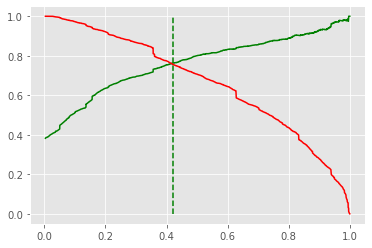

In [190]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.vlines(x=0.42, ymax=1, ymin=0, colors="g", linestyles="--")
plt.show()

In [191]:
### Making predictions on the test set
X_train_sm.drop(columns=['const'],inplace=True)
rfe_col = list(X_train_sm.columns)
print('final list of columns: \n{0}'.format(rfe_col))

final list of columns: 
['TotalWebsiteTime', 'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat', 'LeadSource_Welingak Website', 'DndEmail_Yes', 'LastActivity_Email Opened', 'LastActivity_Others', 'LastActivity_SMS Sent', 'Occupation_Other', 'Occupation_Working Professional', 'LastNotableActivity_Had a Phone Conversation', 'LastNotableActivity_Modified', 'LastNotableActivity_Olark Chat Conversation', 'LastNotableActivity_Unreachable', 'LastNotableActivity_Unsubscribed']


In [192]:
#add constant to X_test_scaled
X_test_sm = sm.add_constant(X_test_scaled_rfe[rfe_col])
X_test_sm.head()

,const,TotalWebsiteTime,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,DndEmail_Yes,LastActivity_Email Opened,LastActivity_Others,LastActivity_SMS Sent,Occupation_Other,Occupation_Working Professional,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed
4871,1.0,1.907826,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1949,1.0,-0.888425,0,1,0,0,0,0,1,1,0,0,1,0,0,0
5628,1.0,1.429927,0,0,0,0,0,0,1,1,0,0,1,0,0,0
8666,1.0,-0.846472,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1025,1.0,0.838939,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Making predictions on the test set

In [193]:
y_test_pred = lr.predict(X_test_sm)

In [194]:
y_test_pred[:10]

4871    0.782808
1949    0.211415
5628    0.505193
8666    0.025206
1025    0.180797
2427    0.868888
5867    0.248897
6557    0.846667
2854    0.971077
6177    0.827058
dtype: float64

In [195]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [196]:
# Let's see the head
y_pred_1.head()

,0
4871,0.782808
1949,0.211415
5628,0.505193
8666,0.025206
1025,0.180797


In [197]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [198]:
# Putting CustID to index
y_test_df['LeadId'] = y_test_df.index

In [199]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [200]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [201]:
y_pred_final.head()

,Converted,LeadId,0
0,0,4871,0.782808
1,1,1949,0.211415
2,0,5628,0.505193
3,0,8666,0.025206
4,1,1025,0.180797


In [202]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [205]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadId','Converted','Converted_Prob'], axis=1)

AttributeError: 'DataFrame' object has no attribute 'reindex_axis'

In [206]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,LeadId,Converted_Prob
0,0,4871,0.782808
1,1,1949,0.211415
2,0,5628,0.505193
3,0,8666,0.025206
4,1,1025,0.180797


In [207]:
y_pred_final['predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.36 else 0)

In [208]:
y_pred_final.head()

,Converted,LeadId,Converted_Prob,predicted
0,0,4871,0.782808,1
1,1,1949,0.211415,0
2,0,5628,0.505193,1
3,0,8666,0.025206,0
4,1,1025,0.180797,0


In [209]:
# Let's check the overall accuracy.
accuracy_score(y_pred_final['Converted'], y_pred_final['predicted'])

0.8137856369541682

In [210]:
# Let's check the f1-score.
f1_score(y_pred_final['Converted'], y_pred_final['predicted'])

0.7710736468500443

In [211]:
confusion_test = confusion_matrix(y_pred_final['Converted'], y_pred_final['predicted'])
confusion_test

array([[1386,  300],
       [ 216,  869]])

In [212]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [213]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8009216589861751

In [214]:
# Let us calculate specificity
TN / float(TN+FP)

0.8220640569395018

In [215]:
# Lets calculate Precision
TP / (TP + FP)

0.7433704020530368

In [216]:
# Lets calcualte Recall
TP / (TP + FN)

0.8009216589861751

In [217]:
test_acc = accuracy_score(y_pred_final['Converted'], y_pred_final['predicted'])
test_sen = TP / (TP + FN)
test_spec = TN / (TN + FP)
test_prec = TP / (TP + FP)
result_metrics.loc[0,'test_acc'] = round(test_acc,2)
result_metrics.loc[0,'test_sen'] = round(test_sen,2)
result_metrics.loc[0,'test_spec'] = round(test_spec,2)
result_metrics.loc[0,'test_prec'] = round(test_prec,2)

In [218]:
result_metrics

,cutoff,train_acc,train_sen,train_spec,train_prec,test_acc,test_sen,test_spec,test_prec
0,0.36,0.81,0.81,0.82,0.73,0.81,0.8,0.82,0.74


## With 0.35 as cut-off point lets check metrics

In [219]:
cutoff1_train = y_train_pred_final.copy()

In [220]:
cutoff1_train['final_predicted'] = cutoff1_train['Converted_Prob'].map( lambda x: 1 if x > 0.35 else 0)

cutoff1_train.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.926517,7417,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.888379,1032,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.472254,6537,1,1,1,1,1,1,0,0,0,0,0,1
3,0,0.160708,7284,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.832044,3194,1,1,1,1,1,1,1,1,1,1,0,1


In [221]:
# Let's check the overall accuracy.
accuracy_score(cutoff1_train['Converted'], cutoff1_train['final_predicted'])

0.8116973541698902

In [222]:
confusion_train1 = confusion_matrix(cutoff1_train['Converted'], cutoff1_train['final_predicted'])
confusion_train1

array([[3158,  831],
       [ 386, 2088]])

In [223]:
TP = confusion_train1[1,1] # true positive 
TN = confusion_train1[0,0] # true negatives
FP = confusion_train1[0,1] # false positives
FN = confusion_train1[1,0] # false negatives

In [224]:
# Let's see the sensitivity of our logistic regression model
TP / (TP+FN)

0.8439773645917542

In [225]:
# Let us calculate specificity
TN / (TN+FP)

0.7916771120581599

In [226]:
# Lets calculate Precision
TP / (TP + FP)

0.7153134635149023

In [227]:
# Lets calculate recall
TP / (TP + FN)

0.8439773645917542

In [228]:
f1_score(cutoff1_train['Converted'],cutoff1_train['final_predicted'])

0.7743371036528833

In [229]:
train_acc = accuracy_score(cutoff1_train['Converted'], cutoff1_train['final_predicted'])
train_sen = TP / (TP + FN)
train_spec = TN / (TN + FP)
train_prec = TP / (TP + FP)
result_metrics.loc[1,'cutoff']=0.35
result_metrics.loc[1,'train_acc'] = round(train_acc,2)
result_metrics.loc[1,'train_sen'] = round(train_sen,2)
result_metrics.loc[1,'train_spec'] = round(train_spec,2)
result_metrics.loc[1,'train_prec'] = round(train_prec,2)

### Making predictions on the test set

In [230]:
cutoff1_test = y_pred_final.copy()

In [231]:
cutoff1_test['final_predicted'] = cutoff1_test['Converted_Prob'].map(lambda x: 1 if x > 0.35 else 0)

In [232]:
cutoff1_test.head()

,Converted,LeadId,Converted_Prob,predicted,final_predicted
0,0,4871,0.782808,1,1
1,1,1949,0.211415,0,0
2,0,5628,0.505193,1,1
3,0,8666,0.025206,0,0
4,1,1025,0.180797,0,0


In [233]:
# Let's check the overall accuracy.
accuracy_score(cutoff1_test['Converted'], cutoff1_test['final_predicted'])

0.8080115481775533

In [234]:
# Let's check the f1-score.
f1_score(cutoff1_test['Converted'], cutoff1_test['final_predicted'])

0.7722602739726027

In [235]:
confusion_test1 = confusion_matrix(cutoff1_test['Converted'], cutoff1_test['final_predicted'])
confusion_test1

array([[1337,  349],
       [ 183,  902]])

In [236]:
TP = confusion_test1[1,1] # true positive 
TN = confusion_test1[0,0] # true negatives
FP = confusion_test1[0,1] # false positives
FN = confusion_test1[1,0] # false negatives

In [237]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8313364055299539

In [238]:
# Let us calculate specificity
TN / float(TN+FP)

0.7930011862396203

In [239]:
# Lets calculate precision
TP/ float(TP+FP)

0.7210231814548361

In [240]:
# Lets calculate recall
TP / float(TP + FN)

0.8313364055299539

In [241]:
test_acc = accuracy_score(cutoff1_test['Converted'], cutoff1_test['final_predicted'])
test_sen = TP / (TP + FN)
test_spec = TN / (TN + FP)
test_prec = TP / (TP + FP)
result_metrics.loc[1,'test_acc'] = round(test_acc,2)
result_metrics.loc[1,'test_sen'] = round(test_sen,2)
result_metrics.loc[1,'test_spec'] = round(test_spec,2)
result_metrics.loc[1,'test_prec'] = round(test_prec,2)

## Observations from above
- With cut-off point as 0.35, we have test accuracy of 80.8%, Sensivity of 83.13% and Precision of 80.3%

In [265]:
result_metrics

,cutoff,train_acc,train_sen,train_spec,train_prec,test_acc,test_sen,test_spec,test_prec
0,0.36,0.81,0.81,0.82,0.73,0.81,0.8,0.82,0.74
1,0.35,0.81,0.84,0.79,0.72,0.81,0.83,0.79,0.72
2,0.37,0.81,0.79,0.83,0.74,0.81,0.79,0.83,0.75


## Observations from above result metrics
- Train and test accuracy, sensitivity and precision scores are almost similar for cutoff at 0.35

##  Lead Score on Train Data

In [266]:
y_train_score_final = cutoff1_train.copy()
y_train_score_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.926517,7417,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.888379,1032,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.472254,6537,1,1,1,1,1,1,0,0,0,0,0,1
3,0,0.160708,7284,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.832044,3194,1,1,1,1,1,1,1,1,1,1,0,1


In [267]:
y_train_score_final['Lead_Score'] = y_train_score_final['Converted_Prob'] * 100
y_train_score_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.926517,7417,1,1,1,1,1,1,1,1,1,1,1,1,92.651679
1,1,0.888379,1032,1,1,1,1,1,1,1,1,1,1,0,1,88.837938
2,0,0.472254,6537,1,1,1,1,1,1,0,0,0,0,0,1,47.225438
3,0,0.160708,7284,0,1,1,0,0,0,0,0,0,0,0,0,16.070783
4,1,0.832044,3194,1,1,1,1,1,1,1,1,1,1,0,1,83.204449


##  Lead Score on Test Data

In [268]:
y_test_score_final = cutoff1_test.copy()
y_test_score_final.head()

,Converted,LeadId,Converted_Prob,predicted,final_predicted
0,0,4871,0.782808,1,1
1,1,1949,0.211415,0,0
2,0,5628,0.505193,1,1
3,0,8666,0.025206,0,0
4,1,1025,0.180797,0,0


In [269]:
y_test_score_final['Lead_Score'] = y_test_score_final['Converted_Prob'] * 100
y_test_score_final.head()

,Converted,LeadId,Converted_Prob,predicted,final_predicted,Lead_Score
0,0,4871,0.782808,1,1,78.280807
1,1,1949,0.211415,0,0,21.141528
2,0,5628,0.505193,1,1,50.519282
3,0,8666,0.025206,0,0,2.520601
4,1,1025,0.180797,0,0,18.079728


## Lets Combine Train and Test Data to get the lead score on complete data set

In [270]:
print('shape of train data set: {0}'.format(y_train_score_final.shape))
print('shape of test data set: {0}'.format(y_test_score_final.shape))

shape of train data set: (6463, 16)
shape of test data set: (2771, 6)


In [271]:
## Lets keep only relevant columns in train data set
y_train_score_final = y_train_score_final[['LeadId','Converted',
                                           'Converted_Prob','predicted','final_predicted','Lead_Score']]
y_train_score_final.head()

,LeadId,Converted,Converted_Prob,predicted,final_predicted,Lead_Score
0,7417,0,0.926517,1,1,92.651679
1,1032,1,0.888379,1,1,88.837938
2,6537,0,0.472254,1,1,47.225438
3,7284,0,0.160708,0,0,16.070783
4,3194,1,0.832044,1,1,83.204449


In [272]:
lead_score_combined = pd.concat([y_train_score_final,y_test_score_final],axis=0,join='outer')
print('shape of combined dataset: {0}'.format(lead_score_combined.shape))
lead_score_combined.head()

shape of combined dataset: (9234, 6)


,LeadId,Converted,Converted_Prob,predicted,final_predicted,Lead_Score
0,7417,0,0.926517,1,1,92.651679
1,1032,1,0.888379,1,1,88.837938
2,6537,0,0.472254,1,1,47.225438
3,7284,0,0.160708,0,0,16.070783
4,3194,1,0.832044,1,1,83.204449


# Conclusions and learning

### top three variables in our model which contribute most towards the probability of a lead getting converted

### top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion


In [273]:
## Lets plot features and respective coefficients from stats regression model
params_df = pd.DataFrame(columns=['coefficient'],data=lr.params).reset_index()
params_df.rename(columns={'index':'feature'},inplace=True)
params_df.drop(index=0,inplace=True)
params_df.sort_values(by='coefficient',ascending=False)

,feature,coefficient
2,LeadOrigin_Lead Add Form,3.466767
11,LastNotableActivity_Had a Phone Conversation,3.123466
4,LeadSource_Welingak Website,2.733684
10,Occupation_Working Professional,2.406889
8,LastActivity_SMS Sent,1.623893
14,LastNotableActivity_Unreachable,1.593580
15,LastNotableActivity_Unsubscribed,1.470591
3,LeadSource_Olark Chat,1.273367
1,TotalWebsiteTime,1.126039
7,LastActivity_Others,0.721333


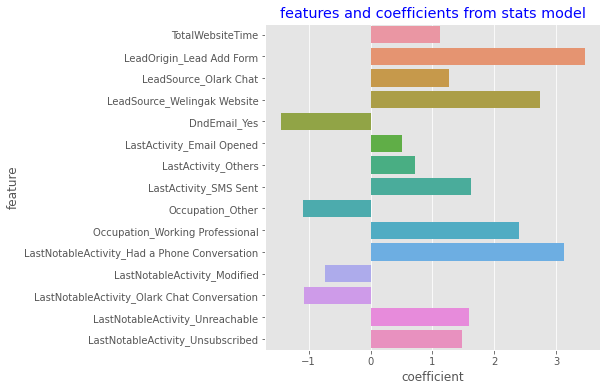

In [274]:
plt.figure(figsize=(6,6))
plt.title('features and coefficients from stats model',color='blue')
sns.barplot(y='feature',x='coefficient',data=params_df);

### Observations from above plot we conclude that
-Top three predictors that contribute in lead conversion are Lead Origin, Last Notable Activity and Lead Source

-Top three categorical/dummy variables are LeadOrigin_Lead Add Form, LastNotableActivity_Had a Phone Conversation and LeadSource_Welingak Website